# Lab 6
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [65]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


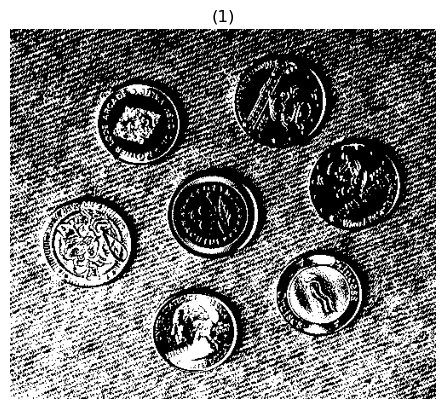

In [66]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
import numpy as np
from skimage import io
import matplotlib.pyplot as plt


threshold = 10
img = io.imread('img/coins.jpg', as_gray=True)
t = 0.6
img[img < t] = 0
img[img >= t] = 1
show_images([img])

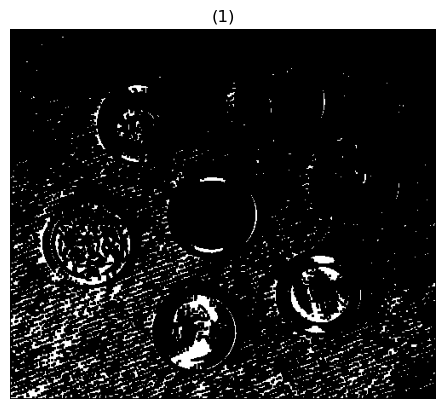

TypeError: dilation() missing 1 required positional argument: 'hit'

In [ ]:


def erosion(img, window_size):
    output = np.zeros_like(img)
    half = window_size // 2
    rows, cols = img.shape

    fit = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ])
    
    for i in range(half, rows - half):
        for j in range(half, cols - half):
            
            window = img[i - half:i + half + 1, j - half:j + half + 1]
            if np.all(window[fit == 1] == 1):
                output[i, j] = 1
            else:
                output[i, j] = 0

    output = output * 255
    return output



output_image = erosion(img, 3)
show_images([output_image])

def dilation(img, window_size,hit):
    output = np.zeros_like(img)
    half = window_size // 2
    rows, cols = img.shape

    hit = np.array([
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ])
    
    for i in range(half, rows - half):
        for j in range(half, cols - half):
            
            window = img[i - half:i + half + 1, j - half:j + half + 1]

           
            if np.any(window[hit == 1] == 1):
                output[i, j] = 1
            else:
                output[i, j] = 0

    output = output * 255
    return output



output_image = dilation(img, 3)
show_images([output_image])
# Use skimage's binary_erosion and binary_dilation and show results
selem = np.ones((3, 3), dtype=bool)

eroded_sk = binary_erosion(img, selem)
dilated_sk = binary_dilation(img, selem)

# Convert to 0-255 for consistent visualization with previous outputs
eroded_vis = (eroded_sk.astype(np.uint8) * 255)
dilated_vis = (dilated_sk.astype(np.uint8) * 255)

show_images('Original (binary)', (img.astype(np.uint8) * 255))
show_images('Skimage Erosion (3x3)', eroded_vis)
show_images('Skimage Dilation (3x3)', dilated_vis)


    
    
    
    
    
    



                

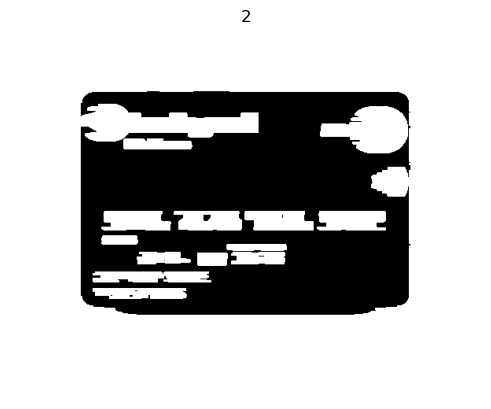

Detected 5 candidate boxes


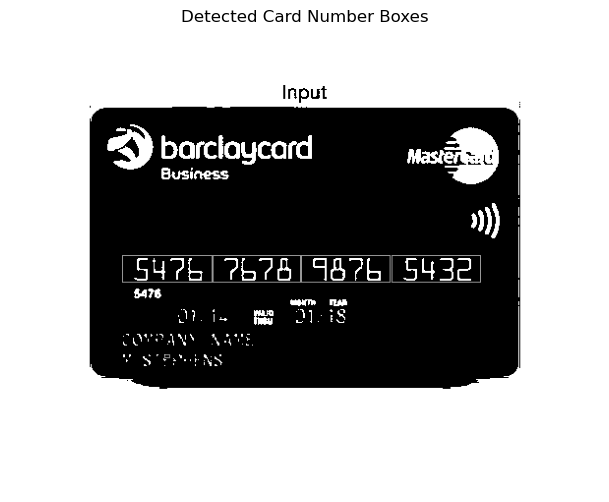

In [ ]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
from skimage.draw import rectangle_perimeter
img = io.imread('img/card.jpg', as_gray=True)

binary_img = img
t = 0.6
binary_img[binary_img < t] = 0
binary_img[binary_img >= t] = 1
closed_img = binary_img
arr = np.ones((3,20)) #creates a rectangular structuring element (3 pixels tall × 20 pixels wide).
for i in range(1):
    closed_img = binary_dilation(closed_img,arr)
show_images("2",closed_img)
contours = find_contours(closed_img, 0.8)
bounding_boxes = []

fbounding_boxes = []
for contour in contours:
    Y = contour[:, 0]
    X = contour[:, 1]

    Xmin, Xmax = int(np.min(X)), int(np.max(X))
    Ymin, Ymax = int(np.min(Y)), int(np.max(Y))

    width = Xmax - Xmin
    height = Ymax - Ymin
    if height == 0:  
        continue

    aspect_ratio = width / height

    # Keep only contours that look like card-number shapes
    if 2.5 <= aspect_ratio <= 3.8:
        bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])


img_with_boxes = np.copy(img)  

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle_perimeter(start=(Ymin, Xmin), end=(Ymax, Xmax), shape=img.shape)
    img_with_boxes[rr, cc] = 1  

# ========== Step 6: Visualize ==========
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')         
plt.imshow(img_with_boxes, cmap='gray', alpha=0.6)  
plt.title("Detected Card Number Boxes")
plt.axis('off')
plt.show()

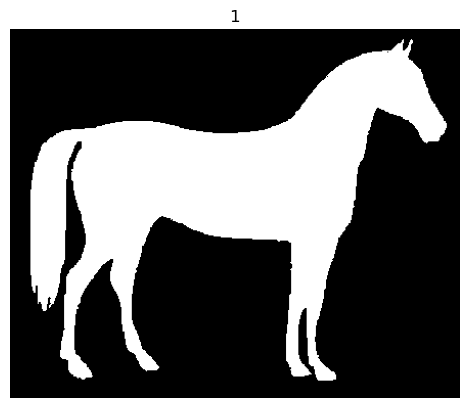

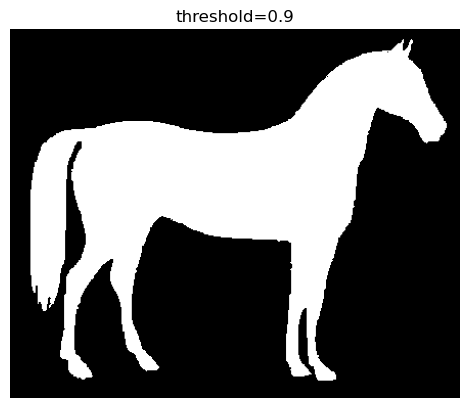

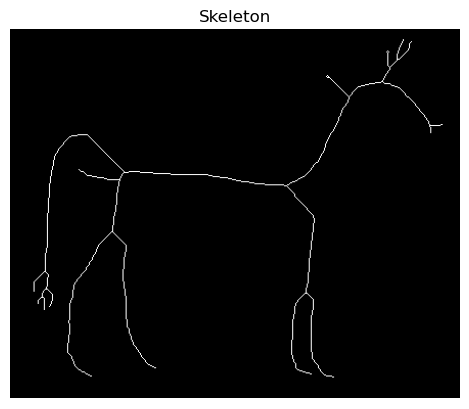

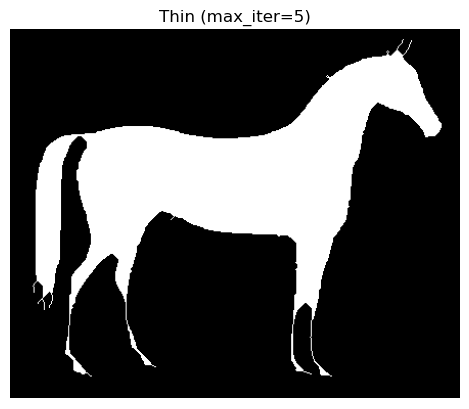

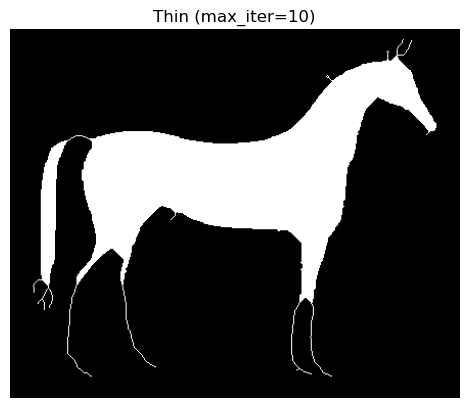

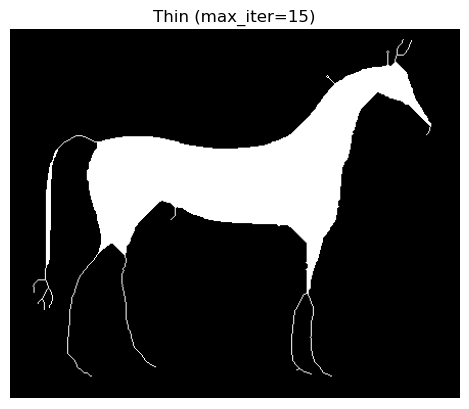

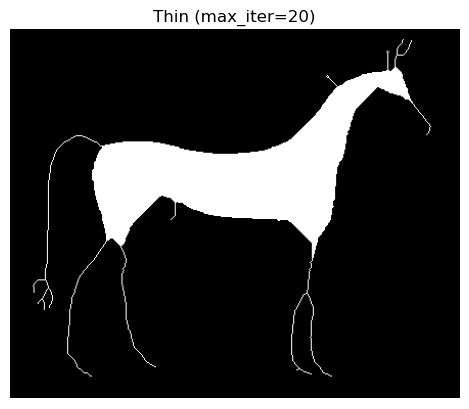

In [ ]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = io.imread('img/horse.jpg', as_gray=True)
t = 0.9
img[img < t] = 0
img[img >= t] = 1
binary_horse = img >= 0.9

show_images('1', img)
show_images('threshold=0.9', binary_horse)
skel = skeletonize(binary_horse)
show_images('Skeleton', skel)

for m in (5, 10, 15, 20):
    th = thin(binary_horse, m)
    show_images(f'Thin (max_iter={m})', th)